In [10]:
from IPython.display import Image
%matplotlib inline

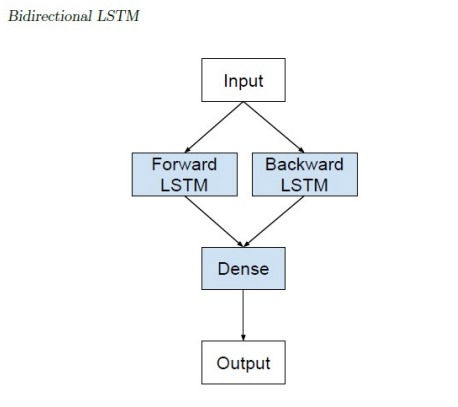

In [11]:
Image(filename='Bidirectional LSTM.jpeg',width=400)

In [12]:
from random import random
from numpy import array
from numpy import cumsum

def get_sequence(n_timesteps):
    x=array([random() for _ in range(n_timesteps)])
    limit=n_timesteps/4.0
    y=array([0 if x<limit else 1 for x in cumsum(x)])
 
    return x,y
x,y=get_sequence(10)
print('Input Sequence-x:\n',x)
print()
print('Output-y:\n',y)

Input Sequence-x:
 [0.3977461  0.14425051 0.73496684 0.11428373 0.21354129 0.90332241
 0.44694526 0.00423847 0.22173925 0.8140943 ]

Output-y:
 [0 0 0 0 0 1 1 1 1 1]


In [13]:
#Generate Multiple Sequences
def get_sequences(n_sequences,n_timesteps):
    seq_x,seq_y=list(),list()

    for _ in range(n_sequences):
        x,y=get_sequence(n_timesteps)
        seq_x.append(x)
        seq_y.append(y)
 
    seq_x=array(seq_x).reshape(n_sequences,n_timesteps,1)
    seq_y=array(seq_y).reshape(n_sequences,n_timesteps,1)
    return seq_x,seq_y
    

In [14]:
get_sequences(2,10)

(array([[[0.33629751],
         [0.6401873 ],
         [0.691292  ],
         [0.82133584],
         [0.00259262],
         [0.34179944],
         [0.54769343],
         [0.09053592],
         [0.57125035],
         [0.79946936]],
 
        [[0.4268812 ],
         [0.33505835],
         [0.55875417],
         [0.1318395 ],
         [0.26410389],
         [0.00594484],
         [0.12958631],
         [0.98467267],
         [0.09435486],
         [0.57334566]]]),
 array([[[0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [1],
         [1],
         [1],
         [1]],
 
        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [1],
         [1]]]))

# Build a Bidirectional model

In [17]:
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers import Dense,LSTM

n_timesteps=10
model=Sequential()

#bidirectional layer
model.add(Bidirectional(LSTM(50,return_sequences=True),input_shape=(n_timesteps,1)))
#Output layer - time distributed layer
model.add(TimeDistributed(Dense(1,activation='sigmoid')))
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 10, 100)           20800     
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 10, 1)             101       
 ributed)                                                        
                                                                 
Total params: 20901 (81.64 KB)
Trainable params: 20901 (81.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [18]:
#train the model
x,y=get_sequences(50000,n_timesteps)
model.fit(x,y,epochs=10,batch_size=10)

Epoch 1/10
5000/5000 [==============================] - 34s 6ms/step - loss: 0.0512 - accuracy: 0.9819
Epoch 2/10
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0206 - accuracy: 0.9927
Epoch 3/10
5000/5000 [==============================] - 31s 6ms/step - loss: 0.0164 - accuracy: 0.9940
Epoch 4/10
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0141 - accuracy: 0.9947
Epoch 5/10
5000/5000 [==============================] - 31s 6ms/step - loss: 0.0128 - accuracy: 0.9951
Epoch 6/10
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0122 - accuracy: 0.9952
Epoch 7/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.0115 - accuracy: 0.9954
Epoch 8/10
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0111 - accuracy: 0.9956
Epoch 9/10
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0103 - accuracy: 0.9959
Epoch 10/10
5000/5000 [==============================] - 30s 6ms/step - l

In [19]:
#Evaluate the model
x,y=get_sequences(100,n_timesteps)
loss,acc=model.evaluate(x,y,verbose=1)
print()
print('Loss: %f, Accuracy: %f'%(loss,acc*100))

4/4 [==============================] - 1s 4ms/step - loss: 0.0116 - accuracy: 0.9950

Loss: 0.011624, Accuracy: 99.500000


In [20]:
# Make prediction
import numpy as np

for _ in range(10):
    x,y=get_sequences(1,n_timesteps)
    yhat=model.predict(x,verbose=0)
    exp,pred=y.reshape(n_timesteps),yhat.reshape(n_timesteps)

    print('y=%s, yhat=%s,correct=%s' % (exp,pred,np.array_equal(exp,pred)))

y=[0 0 0 1 1 1 1 1 1 1], yhat=[1.05736815e-10 1.66655071e-14 1.67534591e-08 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00],correct=False
y=[0 0 0 0 1 1 1 1 1 1], yhat=[1.4106390e-13 3.3131072e-13 1.0000799e-08 8.6641821e-06 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 0 1 1 1 1 1], yhat=[3.5932811e-12 2.3278208e-15 9.2011622e-15 3.4023805e-16 3.0227917e-05
 9.9999982e-01 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 0 1 1 1 1 1], yhat=[1.8689491e-14 4.1141489e-16 6.0005892e-17 2.6144520e-10 2.7325356e-07
 9.9972576e-01 9.9999982e-01 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 0 0 1 1 1 1], yhat=[1.2824969e-13 5.4146374e-15 3.6433373e-15 3.0113969e-14 3.5203875e-16
 3.1088629e-10 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 1 1 1 1 1 1], yhat=[8.7782759e-10 7.3615981

In [21]:
#train the model
x,y=get_sequences(50000,n_timesteps)

model.fit(x,y,epochs=1,batch_size=10)

5000/5000 [==============================] - 30s 6ms/step - loss: 0.0096 - accuracy: 0.9962


In [22]:
# Make prediction
import numpy as np


for _ in range(10):
    x,y=get_sequences(1,n_timesteps)
    ypred=model.predict(x,verbose=0)
    actual,pred=y.reshape(n_timesteps),ypred.reshape(n_timesteps)

    print('y=%s, ypred=%s,correct=%s' % (actual,pred,np.array_equal(actual,ypred)))

y=[0 0 0 0 1 1 1 1 1 1], ypred=[8.0290406e-15 3.4508355e-16 4.9484332e-16 4.7498196e-09 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 0 0 0 1 1 1], ypred=[1.2805914e-15 6.1416003e-17 1.3704814e-16 8.8073381e-14 9.7293021e-16
 3.9254366e-03 4.0979832e-04 9.9993932e-01 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 0 1 1 1 1 1], ypred=[1.9619487e-16 2.8697842e-16 6.6566350e-16 1.0422433e-09 1.8220050e-11
 9.9667484e-01 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 0 1 1 1 1 1], ypred=[1.83451165e-09 2.38126965e-15 1.42037405e-14 2.55188119e-04
 6.00689789e-03 9.99241233e-01 9.99794185e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00],correct=False
y=[0 0 0 0 1 1 1 1 1 1], ypred=[4.1614037e-10 7.3938489e-15 6.0345372e-14 6.2069752e-08 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 1 1 1 1 1 1 1], ypred=[2.4101505e-13 2.8

In [23]:
#train the model
x,y=get_sequences(50000,n_timesteps)

model.fit(x,y,epochs=1,batch_size=10)


5000/5000 [==============================] - 30s 6ms/step - loss: 0.0090 - accuracy: 0.9964


In [24]:
# Make prediction
import numpy as np

for _ in range(10):
    x,y=get_sequences(1,n_timesteps)
    ypred=model.predict(x,verbose=0)
    actual,pred=y.reshape(n_timesteps),ypred.reshape(n_timesteps)

    print('y=%s, ypred=%s,correct=%s' % (actual,pred,np.array_equal(actual,ypred)))

y=[0 0 0 0 0 0 1 1 1 1], ypred=[2.07579006e-17 5.22042975e-16 5.11928722e-14 6.47856961e-15
 1.07446884e-16 3.05739808e-13 9.99999881e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00],correct=False
y=[0 0 0 1 1 1 1 1 1 1], ypred=[1.0251741e-11 8.1295290e-11 2.5026142e-04 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 0 1 1 1 1 1], ypred=[1.7567636e-14 9.4579233e-15 8.3428232e-17 8.5678969e-10 7.8681587e-05
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 1 1 1 1 1 1 1], ypred=[1.9675418e-14 1.1069505e-10 2.0231376e-10 9.9999923e-01 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 1 1 1 1 1 1], ypred=[3.0006053e-11 7.0371636e-17 2.7025148e-11 5.9368294e-06 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 1 1 1 1 1 1], ypred=[7.0030337e-13 7.4